In [1]:
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from torch.optim import Adam
from training import train_score_network_mnist

In [2]:
device = 'cuda'
data = 'MNIST'
model = Unet(channels = 1, dim = 32).to(device)
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32
lr=1e-4
optimizer = Adam(model.parameters(), lr=lr)

In [3]:
tfm = transforms.Compose([transforms.ToTensor(), transforms.Pad(2)])
data = torchvision.datasets.MNIST(f'./data/', transform=tfm, download = True)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

c:\Users\kaity\Desktop\2dDiffusion\diffusion.py:128: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x - (drift - (diffusion**2)*score )*dt + diffusion * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)


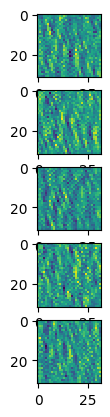

KeyboardInterrupt: 

In [5]:
train_score_network_mnist(data_loader, model, sde, optimizer, epochs=50)